# Basics of Support Vector Machines (Without any ML Library)

If you do the google search for SVM then this is the first result - SVM is a supervised machine learning algorithm which can be used to solve both classification and regression problems. So lets break down that sentence, the first term that appears is Supervised machine learning algorithm which in simple terms means, for algorithm to learn you need the input-ouput pairs (labeled data) of the data. Next term is classification problem in which you have certain classes/categories based on some fearues, so for the new input you have to decide in which category/class it falls (based on its features). Next and last term is regression problem in which based on the data you have to predict the next values. Now I think if you read the definition of the SVM it will be more clear to you.  

We will consider a classification problem for understanding the SVM. Our goal here is to understand how to SVM algorithm works without using any machine learning library. So lets get started by defining six points as follows,

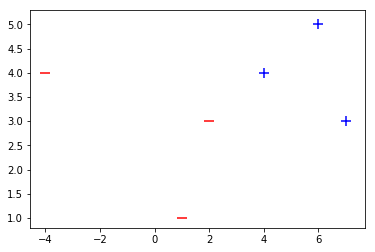

In [1]:
#To help us perform matrix operations
import numpy as np
#to plot our data and model visually
from matplotlib import pyplot as plt
%matplotlib inline
import math

# [X_coordinate Y_coordinate]
input_data = np.array([
    [2,   3],
    [-4,  4],
    [1,   1],
    [4,   4],
    [7,   3],
    [6,   5],
])

input_labels = np.array([-1,-1,-1,1,1,1])

#lets plot these examples on a graph!
for d, sample in enumerate(input_data):
    # Plot the negative samples (the first 3)
    if d < 3:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2,color="red")
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2,color="blue")

Let us consider the data which we can easily separate using simple line(linearly separable). Now if we want to separate the '-' points from the '+' points then tell me intuitively which of the following line would you choose ?

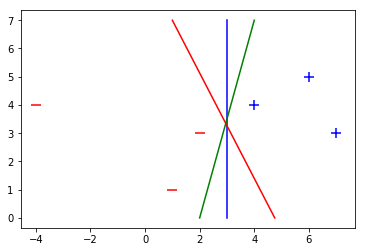

In [2]:
for d, sample in enumerate(input_data):
    # Negative Datapoints
    if d < 3:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2,color="red")
    # Positive Datapoints
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2,color="blue")
plt.plot([3,3],[0,7],color="blue")
plt.plot([4.75,1],[0,7],color="red")
plt.plot([2,4],[0,7],color="green")

I have difficulty choosing between blue line and red line but after carefully observing I would go for red one. Why so? because it gives maximum-margin (margin is the distance between the line and the points nearest to the line). So let us draw margins of the blue and red case.

for the red case the margin is,

Text(0, 4, 'Margin')

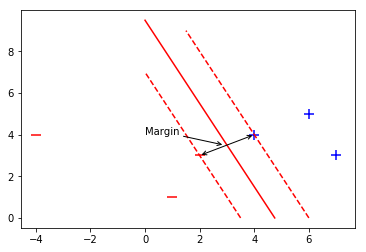

In [3]:
for d, sample in enumerate(input_data):
    if d < 3:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2,color="red")
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2,color="blue")

#I have calculated those points using slope formula here slope of the line m = -2
plt.plot([3.5,0],[0,7],color="red",linestyle="--")
plt.plot([4.75,0],[0,9.5],color="red")
plt.plot([6,1.5],[0,9],color="red",linestyle="dashed")
axs = plt.gca()
axs.annotate("", xy=(2, 3), xytext=(4, 4),arrowprops=dict(arrowstyle="<->"))
axs.annotate("Margin", xy=(2.9, 3.5), xytext=(0, 4),arrowprops=dict(arrowstyle="->"))


Next lets take blue line and draw the margins

Text(0, 4, 'Margin')

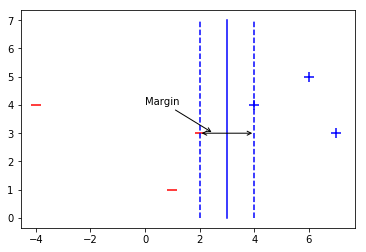

In [4]:
for d, sample in enumerate(input_data):
    if d < 3:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2,color="red")
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2,color="blue")

#m = graham's number
plt.plot([2,2],[0,7],color="blue",linestyle="--")
plt.plot([3,3],[0,7],color="blue")
plt.plot([4,4],[0,7],color="blue",linestyle="dashed")
axs = plt.gca()
axs.annotate("", xy=(2, 3), xytext=(4, 3),arrowprops=dict(arrowstyle="<->"))
axs.annotate("Margin", xy=(2.5, 3), xytext=(0, 4),arrowprops=dict(arrowstyle="->"))

After drawing those grapths we can see that red line gives us more margin than blue one. So in this case Red line is decision boundry also known as hyperplane. So decision boundry/hyperplane is the surface which separates the classes from one another. For finding out decision boundry using mathematics, concepts of linear algebra are used and to summerise those concepts I suggest you to watch series <a href="https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab">Essence of Linear Algebra</a>. 

Those data points near the line (through which the dashed lines are going) if we draw vectors through them then those vectors are known as support vectors as shown in below graph,

Text(2, 6, 'Support Vector 2 (X+)')

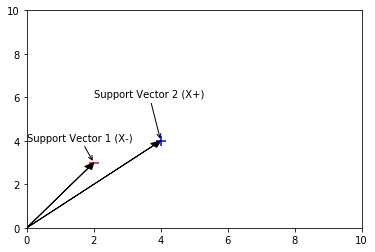

In [5]:
#Support Vector Point 1
plt.scatter(2,3, s=120, marker='_', linewidths=2,color="red") 
#Support Vector Point 2
plt.scatter(4,4, s=120, marker='+', linewidths=2,color="blue")

axs = plt.gca()
axs.set_xlim(left=0,right=10)
axs.set_ylim(top=10,bottom=0)
axs.arrow(0,0,2,3,head_width=0.25, head_length=0.3, fc='k',length_includes_head=True)
axs.arrow(0,0,4,4,head_width=0.25, head_length=0.3, fc='k',length_includes_head=True)

axs.annotate("Support Vector 1 (X-)", xy=(2, 3), xytext=(0, 4),arrowprops=dict(arrowstyle="->"))
axs.annotate("Support Vector 2 (X+)", xy=(4, 4), xytext=(2, 6),arrowprops=dict(arrowstyle="->"))

Those are the support vectors. The support vector which is pointing the the negative sample lets call it as X- and for other one X+. If we carefully observe above figure then we get the margin as, 

$ (X+)   -   (X-) $

lets call above vector MM vector, and if we draw above vector then,

Text(2, 5, 'MM Vector (X+) - (X-)')

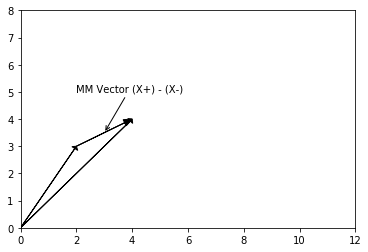

In [6]:

axs = plt.gca()
axs.set_xlim(left=0,right=12)
axs.set_ylim(top=8,bottom=0)
axs.arrow(0,0,2,3,head_width=0.25, head_length=0.1, fc='k',length_includes_head=True)
axs.arrow(0,0,4,4,head_width=0.25, head_length=0.1, fc='k',length_includes_head=True)
axs.arrow(2,3,2,1,head_width=0.25, head_length=0.3, fc='k',length_includes_head=True)

axs.annotate("MM Vector (X+) - (X-)", xy=(3, 3.5), xytext=(2, 5),arrowprops=dict(arrowstyle="->"))

Now let us draw the lines perpendicular to the MM Vector

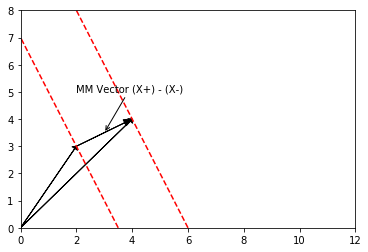

In [7]:

axs = plt.gca()
axs.set_xlim(left=0,right=12)
axs.set_ylim(top=8,bottom=0)
axs.arrow(0,0,2,3,head_width=0.25, head_length=0.1, fc='k',length_includes_head=True)
axs.arrow(0,0,4,4,head_width=0.25, head_length=0.1, fc='k',length_includes_head=True)
axs.arrow(2,3,2,1,head_width=0.25, head_length=0.3, fc='k',length_includes_head=True)

axs.annotate("MM Vector (X+) - (X-)", xy=(3, 3.5), xytext=(2, 5),arrowprops=dict(arrowstyle="->"))

plt.plot([3.5,0],[0,7],color="red",linestyle="--")
plt.plot([6,1.5],[0,9],color="red",linestyle="dashed")

Those two red dashed lines are perpendicular to the MM vector. If we consider one of the line to be our hyperplane then 
there is chance that our classification may be wrong. e.g. let us consider the first line as hyperplane and a negative datapoint as shown in below graph,

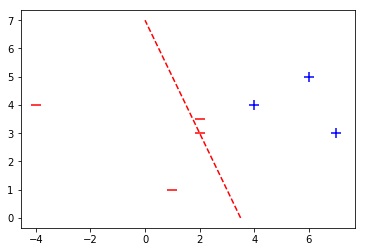

In [8]:
for d, sample in enumerate(input_data):
    if d < 3:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2,color="red")
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2,color="blue")
plt.plot([3.5,0],[0,7],color="red",linestyle="--")
plt.scatter(2,3.5,color="red",marker="_",linewidths=2,s=120)

We can observe that the red point will get missclassified if we take the decision boundry as shown and same will be possible if we take another dashed line as our decision boundry. The solution to this problem is take the decision boundry at somewhat middle and parallel to those dashed lines. So now the problem is how to findout that point ? for finding that lets consider an vector W which points to the required point. now If we findout the W vector then our problem will be solved. For finding out right W we will write python code but before that let us consider we found right W as shown below,

Text(1, 4, 'W vector')

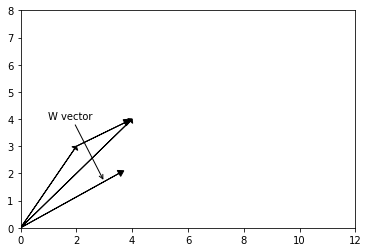

In [9]:
axs = plt.gca()
axs.set_xlim(left=0,right=12)
axs.set_ylim(top=8,bottom=0)
axs.arrow(0,0,2,3,head_width=0.25, head_length=0.1, fc='k',length_includes_head=True)
axs.arrow(0,0,4,4,head_width=0.25, head_length=0.1, fc='k',length_includes_head=True)
axs.arrow(2,3,2,1,head_width=0.25, head_length=0.3, fc='k',length_includes_head=True)

axs.arrow(0,0,3.7,2.1,head_width=0.25,head_length=0.2,fc='k',length_includes_head=True)

axs.annotate("W vector", xy=(3,1.7),xytext=(1,4),arrowprops=dict(arrowstyle="->"))

Then upon coming any new point which is not in our dataset how will we find the class of that point ? well you will answer this question as - "we see if the new point is at which part of the line(hyperplane/Decision surface) if the new point is at the negative side then that point falls under negative category and vice versa." Well I say you are right but how to see that mathematically ? because all we have are vectors. For that let us consider the length of the vector W is C. (Here the concept of projection of vector onto another vector is used.) The steps to findout the class of unknown point are,
1. Draw a vector pointing to that point
2. Project that vector onto W vector
3. Findout the length of projection
4. Compare the l(Projection) with C
5. Decide the class.  
    In our case,
    If l(Projection) > C then the datapoint is positive
    If l(Projection) < C them the datapoint is negative

we can get the length of the projection using dot product. So only thing now remaining is finding out the vector W

But first we need some terminologies so lets define those terminologies,
1. W - Weight Vector
2. X - Input vectors from Dataset
3. Y - labels of those vectors if 1st vector is of positive class then Y[0] will be +1 otherwise -1
4. learning_rate - How fast the values of Weight vector should get modified after each iteration of datapoints.

Now algorithm to findout the W vector
1. Initialize the W vector with random values
2. Predict the output and for predcting the output - Take the dot product of the W with input vector X (Projecting X onto W)
3. Compare it with the label we have i.e. Y[i] If correct output gets predicted then no need to modify W else need for  modification W
4. update W as learning_rate times Input Vector X times Correct label i.e. Y
5. Repeat for step 2,3,4 untill we get all correct output.

Now Coding Time,

In [10]:
# [Xvalue Yvalue]
X = np.array([[2,   3],[-4,  4],[1,   1],[4,   4],[7,   3],[6,   5]])
Y = np.array([-1,-1,-1,1,1,1])
#Number of times we need to go through dataset
epochs = 2
w=[0.5,0.5]
learning_rate = 0.8
for epoch in range(0,epochs):
    for i, x in enumerate(X):
        projection = np.dot(X[i], w)
        length = math.sqrt(sum(np.square(w)))
        #According to step 3 -
        #Predicted o/p is wrong in following two cases
        #if projection length > l(W) and actual class is -ve
        #if projection length < l(W) and actual class is +ve
        if( (projection <= length and Y[i] == 1) or ((projection >= length and Y[i] == -1)) ):
            #update the weights if wrong predicted class
            w += learning_rate * (X[i] * Y[i])
print(w)

[3.7 2.1]


Now if we draw the weight vector and the hyperplane which is perpendicular to it then we can get the graph like,

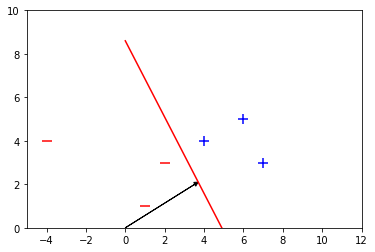

In [11]:

for d, sample in enumerate(input_data):
    if d < 3:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2,color="red")
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2,color="blue")
axs = plt.gca()
axs.set_xlim(left=-5,right=12)
axs.set_ylim(top=10,bottom=0)
axs.arrow(0,0,3.7,2.1,head_width=0.2,head_length=0.2,fc='k',length_includes_head=True)
plt.plot([4.9,0],[0,8.6],color="red",linestyle="-")

I know this is not the final hyperplane and It still needs an improvement. But our goal here was to understand the SVM.

The resulted hyperplane we have got does not have the maximum margin. So what if we want to achieve maximum margin scenario ? Here in this example we have considered far less parameters and for updating the values of the Weight vector we have used a very simple method, If we introduce different methods for updating weights and finding loss, then we can achieve the maximum margin scenario. For understanding more about SVM you can refer videos <a href="https://www.youtube.com/watch?v=_PwhiWxHK8o">SVM MIT Open Courceware</a> and <a href="https://www.youtube.com/watch?v=g8D5YL6cOSE">SVM By Siraj Raval</a> and for basic introduction without Math refer <a href="https://www.youtube.com/watch?v=-Z4aojJ-pdg">How SVM work</a>